In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | kutum
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | zhizdra
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | mitsamiouli
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | eyl
Processing Record 14 of Set 1 | gunjur
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | los banos
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | ulaanbaatar
Processing Record 23 of Set 1 | sur
Process

Processing Record 38 of Set 4 | pagudpud
Processing Record 39 of Set 4 | huarmey
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | rognan
Processing Record 43 of Set 4 | kimbe
Processing Record 44 of Set 4 | constantine
Processing Record 45 of Set 4 | shurugwi
Processing Record 46 of Set 4 | borovskoy
Processing Record 47 of Set 4 | yoichi
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | murom
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | jumla
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | yen bai
Processing Record 4 of Set 5 | kemijarvi
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | itapirapua
Processing Record 8 of Set 5 | atuona
Processing Record 9 of Set 5 | sistranda
Processing Record 10 of Set 5 | lalmohan
Processing Record 11 of Set 5 | koba

Processing Record 27 of Set 8 | namatanai
Processing Record 28 of Set 8 | tartagal
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | inzhavino
Processing Record 31 of Set 8 | vagur
Processing Record 32 of Set 8 | shivrajpur
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | george town
Processing Record 35 of Set 8 | esperance
Processing Record 36 of Set 8 | kaitangata
Processing Record 37 of Set 8 | smyrna
Processing Record 38 of Set 8 | bandarban
Processing Record 39 of Set 8 | aki
Processing Record 40 of Set 8 | osypenko
Processing Record 41 of Set 8 | chowchilla
Processing Record 42 of Set 8 | kisangani
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | tevaitoa
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | krivopolyanye
City not found. Skipping...
Processing Record 48 of Set 8 | dzaoudzi
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set

Processing Record 16 of Set 12 | aporawan
City not found. Skipping...
Processing Record 17 of Set 12 | belmonte
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | san cristobal
Processing Record 20 of Set 12 | ostrovnoy
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | iquique
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | sembe
Processing Record 25 of Set 12 | chum phae
Processing Record 26 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 27 of Set 12 | warrington
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | teguise
Processing Record 30 of Set 12 | mercedes
Processing Record 31 of Set 12 | mareeba
Processing Record 32 of Set 12 | muros
Processing Record 33 of Set 12 | aranos
Processing Record 34 of Set 12 | gornyy
Processing Record 35 of Set 12 | omboue
Processing Record 36 of Set 12 | trinidad
Processing Record 37 of Set 12 | arkadelphia
P

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,48.33,92,4,4.59,AU,2022-06-17 16:04:23
1,Hermanus,-34.4187,19.2345,61.02,57,0,9.08,ZA,2022-06-17 16:04:23
2,Chokurdakh,70.6333,147.9167,36.59,74,98,10.69,RU,2022-06-17 16:04:23
3,Castro,-24.7911,-50.0119,69.64,62,46,13.67,BR,2022-06-17 16:03:18
4,Dikson,73.5069,80.5464,31.23,95,39,13.02,RU,2022-06-17 16:04:24
5,Kutum,14.2000,24.6667,92.68,14,30,10.54,SD,2022-06-17 16:04:24
6,Luderitz,-26.6481,15.1594,58.95,77,0,8.63,NA,2022-06-17 16:04:24
7,Zhizdra,53.7460,34.7395,63.66,71,86,6.51,RU,2022-06-17 16:04:25
8,Albany,42.6001,-73.9662,82.78,49,3,1.99,US,2022-06-17 16:00:24
9,Nikolskoye,59.7035,30.7861,57.09,77,100,7.20,RU,2022-06-17 16:04:25


In [9]:
# Recall Column names
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [10]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2022-06-17 16:04:23,-38.2667,141.9667,48.33,92,4,4.59
1,Hermanus,ZA,2022-06-17 16:04:23,-34.4187,19.2345,61.02,57,0,9.08
2,Chokurdakh,RU,2022-06-17 16:04:23,70.6333,147.9167,36.59,74,98,10.69
3,Castro,BR,2022-06-17 16:03:18,-24.7911,-50.0119,69.64,62,46,13.67
4,Dikson,RU,2022-06-17 16:04:24,73.5069,80.5464,31.23,95,39,13.02


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

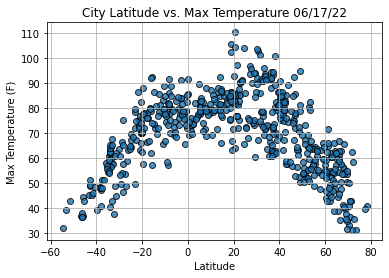

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

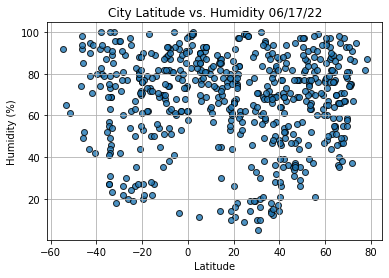

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

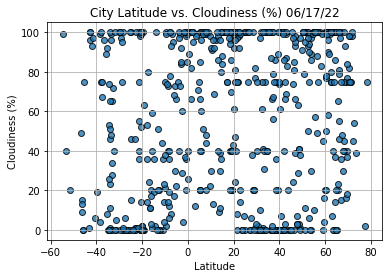

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

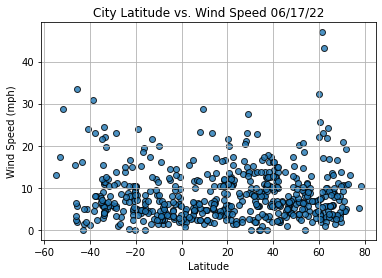

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Gunjur
Lat                       13.2019
Lng                      -16.7339
Max Temp                    79.34
Humidity                       69
Cloudiness                     86
Wind Speed                  12.35
Country                        GM
Date          2022-06-17 16:04:26
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
564    False
565     True
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Chokurdakh,70.6333,147.9167,36.59,74,98,10.69,RU,2022-06-17 16:04:23
4,Dikson,73.5069,80.5464,31.23,95,39,13.02,RU,2022-06-17 16:04:24
5,Kutum,14.2000,24.6667,92.68,14,30,10.54,SD,2022-06-17 16:04:24
7,Zhizdra,53.7460,34.7395,63.66,71,86,6.51,RU,2022-06-17 16:04:25
8,Albany,42.6001,-73.9662,82.78,49,3,1.99,US,2022-06-17 16:00:24


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

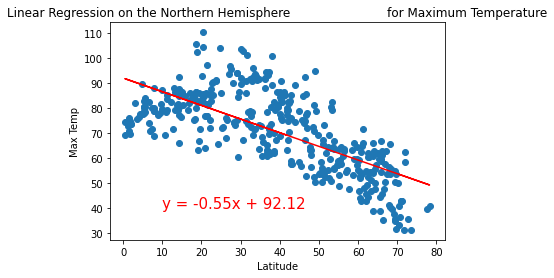

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

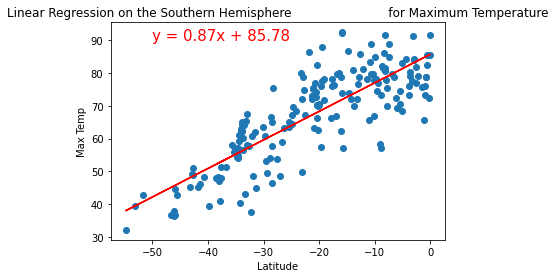

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

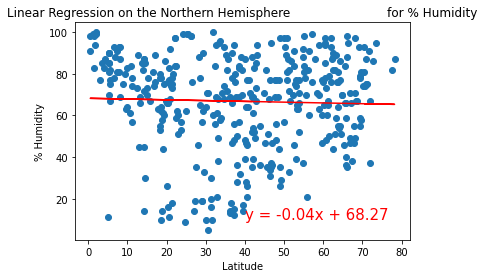

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

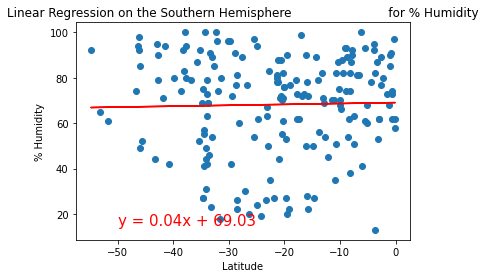

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

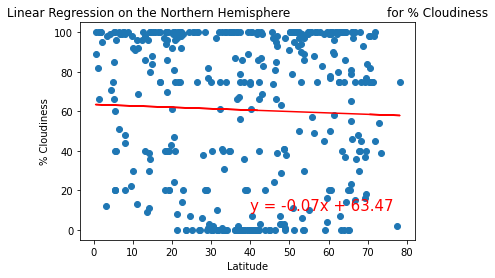

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

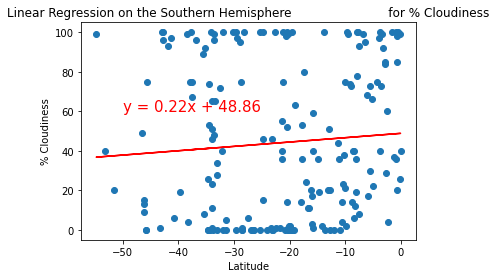

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

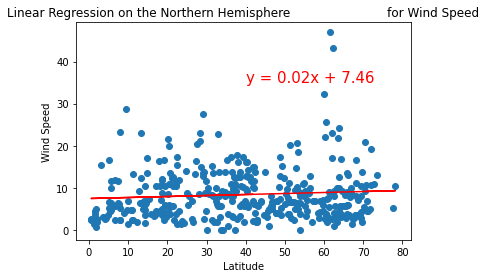

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

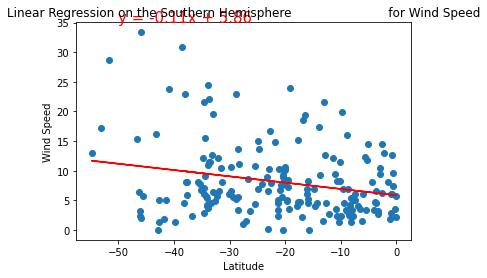

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))